# Coarse sweep over SP500 results
 Done by Aditya Pidaparti
 Begun on Mar 14, 2018

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [3]:
#Setup
data_file = '../Rejection/sp500/compare_100/2018-04-18 05:33:02'
first = pd.read_csv(data_file)

first.describe()

,Unnamed: 0,Beta Range,Alpha,Gamma,Eta,Max Risk,Wealth,No Risk Wealth
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,49.500000,107.940000,0.14000,0.004265,19.570000,0.997000,0.345799,1.784425e-01
std,29.011492,87.124759,0.11547,0.003643,6.757345,0.291445,0.386444,2.550626e-01
min,0.000000,21.000000,0.00000,0.000000,8.000000,0.500000,0.000020,5.201629e-08
25%,24.750000,42.000000,0.00000,0.001000,14.000000,0.750000,0.020983,1.052746e-03
50%,49.500000,63.000000,0.20000,0.005000,19.500000,1.000000,0.159413,2.596043e-02
75%,74.250000,126.000000,0.20000,0.005000,24.000000,1.250000,0.675769,2.741899e-01
max,99.000000,252.000000,0.30000,0.010000,31.000000,1.450000,1.509666,7.798501e-01


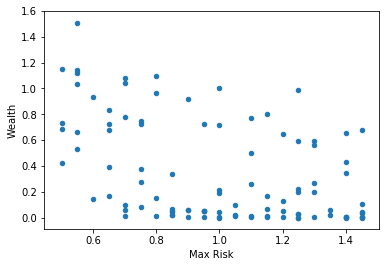

In [4]:
first['Difference'] = (first['No Risk Wealth'] - first['Wealth'])#/first['No Risk Wealth']
# first['Difference'] = first['Difference'].apply()
first.plot.scatter(x='Max Risk',y='Wealth')
plt.show()

Note the large number of results that go to zero. Might want to remove them for further analysis or retest only interesting values.

Given that the data is so variable and bunched at certain risks, might want to decrease step size and take more data points. To show relative differences when wealth goes to zero, might want to clean and extract data to remove data points where wealth goes to zero.

## Extraing basic plots from ALL data

The next step is to compute results from all data. First, the results from all datasets with 100 tests will be aggregated. However, this sampling was done with replacement, so if there is significant overlap, the duplicate results will be removed.

In [10]:
path ='../Rejection/sp500/compare_100/'
files = glob.glob(path + '*')
frame = pd.DataFrame()

data_list = []
for file in files:
    df = pd.read_csv(file,index_col=None, header=0)
    data_list.append(df)

all_data = pd.concat(data_list)

print(all_data.describe())

       Unnamed: 0  Beta Range       Alpha       Gamma         Eta    Max Risk  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean    49.500000  101.272500    0.150125    0.003919   19.696250    0.986938   
std     28.884128   84.015752    0.112654    0.003552    6.820897    0.291528   
min      0.000000   21.000000    0.000000    0.000000    8.000000    0.500000   
25%     24.750000   42.000000    0.000000    0.001000   14.000000    0.750000   
50%     49.500000   63.000000    0.200000    0.002500   20.000000    1.000000   
75%     74.250000  126.000000    0.200000    0.005000   25.000000    1.250000   
max     99.000000  252.000000    0.300000    0.010000   31.000000    1.450000   

           Wealth  No Risk Wealth  
count  800.000000    8.000000e+02  
mean     0.374365    1.911982e-01  
std      0.374717    2.499989e-01  
min      0.000002    4.526169e-08  
25%      0.047960    1.874919e-03  
50%      0.264033    4.677440e-02  
75%      0.628703 

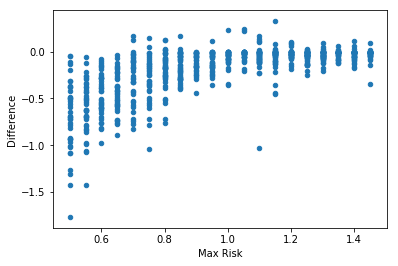

In [13]:
all_data['Difference'] = (all_data['No Risk Wealth'] - all_data['Wealth'])

all_data.plot.scatter(x='Max Risk',y='Difference')
plt.show()